In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

from plotnine import *

# Redukcja liczby predykatorów w zestawie danych z Winami

In [56]:
wines = pd.read_csv('wina.csv', sep=',', decimal='.');
wines

X = wines[wines.columns[:-1]] 
y = wines[wines.columns[-1]]

## Standaryzacja

In [57]:
wines_Stand = StandardScaler()
x = wines_Stand.fit_transform(X)

x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Podział na zbiór uczący i treningowy

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

## Budowanie klasyfikatora z wykorzystaniem drzew decyzyjnych

In [82]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)

DecisionTreeClassifier()

## Ocena jakości klasyfikatora

In [83]:
print("Wszystkie zmienne:" , dt1.score(X_train, y_train))

Wszystkie zmienne: 1.0


In [84]:
y_pred = dt1.predict(X_test)

In [85]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 17  2]
 [ 0  6 15]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.74      0.89      0.81        19
           3       0.88      0.71      0.79        21

    accuracy                           0.85        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.86      0.85      0.85        54



## Redukcja przestrzeni cech

In [63]:
pca = PCA().fit(X)

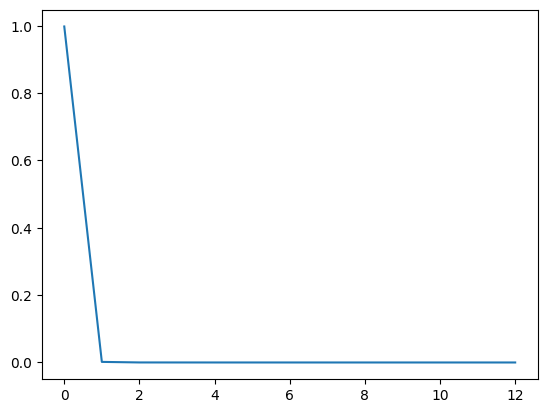

In [64]:
plt.plot(pca.explained_variance_ratio_)

## Prezentacja oryginalnych cech w przestrzeni nowych cech

In [98]:
licz_pc = 2
ladunki = pca.components_[:licz_pc].T
skladowe = ["PC"+str(i) for i in range(1, licz_pc+1)]
ladunki_df = pd.DataFrame(ladunki, columns = skladowe,
                        index=wines.columns[:-1])
ladunki_df

,PC1,PC2
x1,0.001659,0.001203
x2,-0.000681,0.002155
x3,0.000195,0.004594
x4,-0.004671,0.026450
x5,0.017868,0.999344
x6,0.000990,0.000878
x7,0.001567,-0.000052
x8,-0.000123,-0.001354
x9,0.000601,0.005004
x10,0.002327,0.015100


In [99]:
X_PCA = pca.transform(X)
X_PCA2 = X_PCA[:,0:3]

In [100]:
X_PCA2_train, X_PCA2_test, y_PCA2_train, y_PCA2_test = train_test_split(X_PCA2, y, test_size=0.30, random_state=100)

In [101]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_PCA2_train, y_PCA2_train)

DecisionTreeClassifier()

In [102]:
print(dt2.score(X_PCA2_train, y_PCA2_train))

1.0


In [103]:
y_PCA2_pred = dt2.predict(X_PCA2_test)

In [104]:
print(confusion_matrix(y_PCA2_test, y_PCA2_pred))
print(classification_report(y_PCA2_test, y_PCA2_pred))

[[14  0  0]
 [ 3 15  1]
 [ 1 11  9]]
              precision    recall  f1-score   support

           1       0.78      1.00      0.88        14
           2       0.58      0.79      0.67        19
           3       0.90      0.43      0.58        21

    accuracy                           0.70        54
   macro avg       0.75      0.74      0.71        54
weighted avg       0.75      0.70      0.69        54

